In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline



In [23]:
data = pd.read_csv("bank-additional-full.csv", sep=";", quotechar='"')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [25]:
data["y"] = data["y"].apply(lambda x: 1 if x == "yes" or x == 1 else 0)
data["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [26]:
data = data.drop(columns=["duration"])
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [40]:
data_categorical = data.select_dtypes(include=["object"])
data_numeric = data.select_dtypes(exclude=["object"])
data_categorical = pd.get_dummies(data_categorical)

data_processing = pd.concat([data_numeric, data_categorical], axis="columns").drop(columns=["y"])
data.shape, data_processing.shape

((41188, 20), (41188, 62))

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data_processing, data["y"])
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((30891, 62), (10297, 62), (30891,), (10297,))

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_normalize_train = scaler.transform(x_train)
x_normalize_val = scaler.transform(x_val)
x_normalize_train.shape, x_normalize_val.shape

((30891, 62), (10297, 62))

In [71]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit(x_normalize_train, y_train)

In [75]:
y_train_predict = model.predict_proba(x_normalize_train)[:,1]
y_val_predict = model.predict_proba(x_normalize_val)[:,1]
y_train_predict.shape, y_val_predict.shape

((30891,), (10297,))

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score
metric_predict_train = roc_auc_score(y_train, y_train_predict )
metric_predict_val = roc_auc_score(y_val, y_val_predict)

metric_predict_train, metric_predict_val

(0.7938892725801128, 0.7957951819496437)

Train predict (roc_auc) 0.7938892725801128
Test predict (roc_auc) 0.7957951819496437


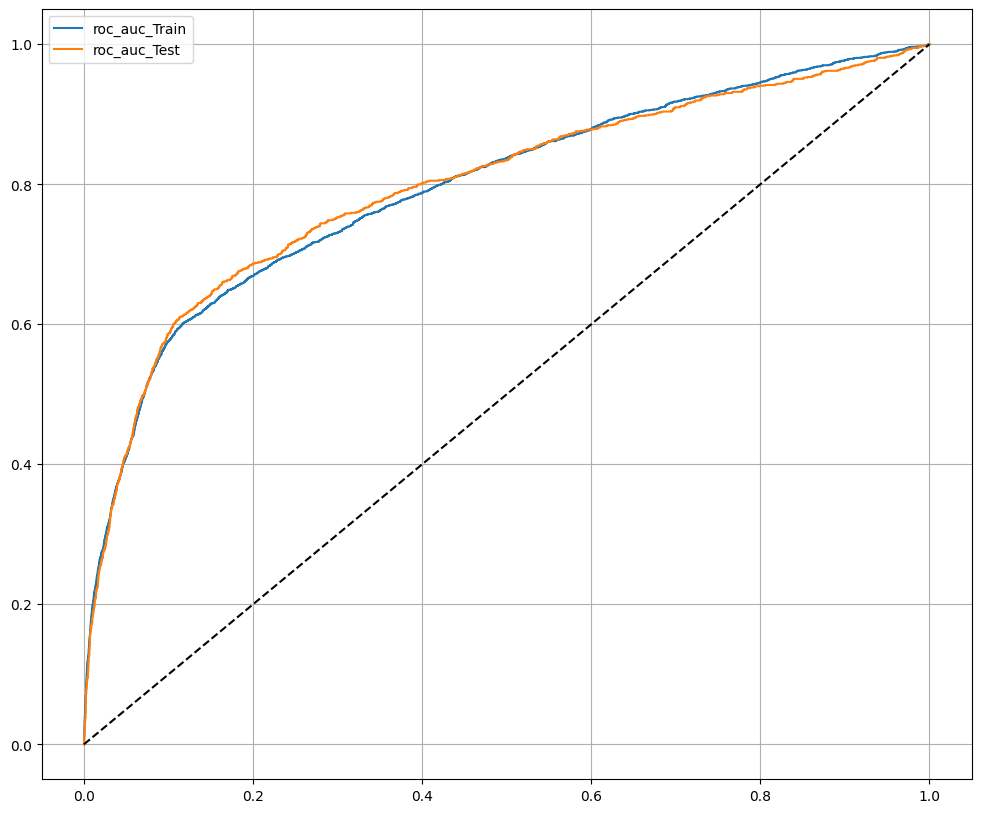

In [78]:
plt.figure(figsize=(12,10))
print(f"Train predict (roc_auc) {metric_predict_train}")
print(f"Test predict (roc_auc) {metric_predict_val}")

plt.plot(*roc_curve(y_train, y_train_predict)[:2], label="roc_auc_Train")
plt.plot(*roc_curve(y_val, y_val_predict)[:2], label="roc_auc_Test")

plt.plot([0,1], [0,1], linestyle="--", color="black")
plt.grid(True)
plt.legend()
plt.show()

In [53]:
# from sklearn
# from sklearn.metrics import precision_score

# true = [0,1,1,0,0,1,1,0,0,0]

# pred = [0,1,1,0,0,1,0,1,0,1]

# print (precision_score(true,pred))

(array([0.        , 0.01464305, 1.        ]),
 array([0.        , 0.23302909, 1.        ]))